#  MIE 479 Capstone - Problem Definition

Lenders want to lend. Where do lenders get the money to lend you money for a house?

The goal: design a model/automated lending decision system to run a profitable lending business. 

This notebook prepares the acquisition data and the performance data for the Fannie Mae loan dataset. In the end we output three datasets. One for 2020, one for 2021 and one for 2022. We allow for at least 1 year of performance observation by including the data for 2023. 


In [1]:
import pandas as pd
import os
import numpy as np
### Define the column names and column data types (classes)
# There are 110 columns in the raw data, corresponding to the glossary
lppub_column_names = ["POOL_ID", "LOAN_ID", "ACT_PERIOD", "CHANNEL", "SELLER", "SERVICER",
                      "MASTER_SERVICER", "ORIG_RATE", "CURR_RATE", "ORIG_UPB", "ISSUANCE_UPB",
                      "CURRENT_UPB", "ORIG_TERM", "ORIG_DATE", "FIRST_PAY", "LOAN_AGE",
                      "REM_MONTHS", "ADJ_REM_MONTHS", "MATR_DT", "OLTV", "OCLTV",
                      "NUM_BO", "DTI", "CSCORE_B", "CSCORE_C", "FIRST_FLAG", "PURPOSE",
                      "PROP", "NO_UNITS", "OCC_STAT", "STATE", "MSA", "ZIP", "MI_PCT",
                      "PRODUCT", "PPMT_FLG", "IO", "FIRST_PAY_IO", "MNTHS_TO_AMTZ_IO",
                      "DLQ_STATUS", "PMT_HISTORY", "MOD_FLAG", "MI_CANCEL_FLAG", "Zero_Bal_Code",
                      "ZB_DTE", "LAST_UPB", "RPRCH_DTE", "CURR_SCHD_PRNCPL", "TOT_SCHD_PRNCPL",
                      "UNSCHD_PRNCPL_CURR", "LAST_PAID_INSTALLMENT_DATE", "FORECLOSURE_DATE",
                      "DISPOSITION_DATE", "FORECLOSURE_COSTS", "PROPERTY_PRESERVATION_AND_REPAIR_COSTS",
                      "ASSET_RECOVERY_COSTS", "MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS",
                      "ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY", "NET_SALES_PROCEEDS",
                      "CREDIT_ENHANCEMENT_PROCEEDS", "REPURCHASES_MAKE_WHOLE_PROCEEDS",
                      "OTHER_FORECLOSURE_PROCEEDS", "NON_INTEREST_BEARING_UPB", "PRINCIPAL_FORGIVENESS_AMOUNT",
                      "ORIGINAL_LIST_START_DATE", "ORIGINAL_LIST_PRICE", "CURRENT_LIST_START_DATE",
                      "CURRENT_LIST_PRICE", "ISSUE_SCOREB", "ISSUE_SCOREC", "CURR_SCOREB",
                      "CURR_SCOREC", "MI_TYPE", "SERV_IND", "CURRENT_PERIOD_MODIFICATION_LOSS_AMOUNT",
                      "CUMULATIVE_MODIFICATION_LOSS_AMOUNT", "CURRENT_PERIOD_CREDIT_EVENT_NET_GAIN_OR_LOSS",
                      "CUMULATIVE_CREDIT_EVENT_NET_GAIN_OR_LOSS", "HOMEREADY_PROGRAM_INDICATOR",
                      "FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT", "RELOCATION_MORTGAGE_INDICATOR",
                      "ZERO_BALANCE_CODE_CHANGE_DATE", "LOAN_HOLDBACK_INDICATOR", "LOAN_HOLDBACK_EFFECTIVE_DATE",
                      "DELINQUENT_ACCRUED_INTEREST", "PROPERTY_INSPECTION_WAIVER_INDICATOR",
                      "HIGH_BALANCE_LOAN_INDICATOR", "ARM_5_YR_INDICATOR", "ARM_PRODUCT_TYPE",
                      "MONTHS_UNTIL_FIRST_PAYMENT_RESET", "MONTHS_BETWEEN_SUBSEQUENT_PAYMENT_RESET",
                      "INTEREST_RATE_CHANGE_DATE", "PAYMENT_CHANGE_DATE", "ARM_INDEX",
                      "ARM_CAP_STRUCTURE", "INITIAL_INTEREST_RATE_CAP", "PERIODIC_INTEREST_RATE_CAP",
                      "LIFETIME_INTEREST_RATE_CAP", "MARGIN", "BALLOON_INDICATOR",
                      "PLAN_NUMBER", "FORBEARANCE_INDICATOR", "HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR",
                      "DEAL_NAME", "RE_PROCS_FLAG", "ADR_TYPE", "ADR_COUNT", "ADR_UPB", 
                      "PAYMENT_DEFERRAL_MOD_EVENT_FLAG", "INTEREST_BEARING_UPB"]

# Updating column classes, converting integers to 'float' where NaN is expected
lppub_column_classes = {"POOL_ID": str, "LOAN_ID": str, "ACT_PERIOD": str, "CHANNEL": str, "SELLER": str, "SERVICER": str,
                        "MASTER_SERVICER": str, "ORIG_RATE": float, "CURR_RATE": float, "ORIG_UPB": float, "ISSUANCE_UPB": float,
                        "CURRENT_UPB": float, "ORIG_TERM": "Int64", "ORIG_DATE": str, "FIRST_PAY": str, "LOAN_AGE": "Int64",
                        "REM_MONTHS": "Int64", "ADJ_REM_MONTHS": "Int64", "MATR_DT": str, "OLTV": float, "OCLTV": float,
                        "NUM_BO": "Int64", "DTI": float, "CSCORE_B": "Int64", "CSCORE_C": "Int64", "FIRST_FLAG": str, "PURPOSE": str,
                        "PROP": str, "NO_UNITS": "Int64", "OCC_STAT": str, "STATE": str, "MSA": str, "ZIP": str, "MI_PCT": float,
                        "PRODUCT": str, "PPMT_FLG": str, "IO": str, "FIRST_PAY_IO": str, "MNTHS_TO_AMTZ_IO": "Int64",
                        "DLQ_STATUS": str, "PMT_HISTORY": str, "MOD_FLAG": str, "MI_CANCEL_FLAG": str, "Zero_Bal_Code": str,
                        "ZB_DTE": str, "LAST_UPB": float, "RPRCH_DTE": str, "CURR_SCHD_PRNCPL": float, "TOT_SCHD_PRNCPL": float,
                        "UNSCHD_PRNCPL_CURR": float, "LAST_PAID_INSTALLMENT_DATE": str, "FORECLOSURE_DATE": str,
                        "DISPOSITION_DATE": str, "FORECLOSURE_COSTS": float, "PROPERTY_PRESERVATION_AND_REPAIR_COSTS": float,
                        "ASSET_RECOVERY_COSTS": float, "MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS": float,
                        "ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY": float, "NET_SALES_PROCEEDS": float,
                        "CREDIT_ENHANCEMENT_PROCEEDS": float, "REPURCHASES_MAKE_WHOLE_PROCEEDS": float,
                        "OTHER_FORECLOSURE_PROCEEDS": float, "NON_INTEREST_BEARING_UPB": float, "PRINCIPAL_FORGIVENESS_AMOUNT": float,
                        "ORIGINAL_LIST_START_DATE": str, "ORIGINAL_LIST_PRICE": float, "CURRENT_LIST_START_DATE": str,
                        "CURRENT_LIST_PRICE": float, "ISSUE_SCOREB": "Int64", "ISSUE_SCOREC": "Int64", "CURR_SCOREB": "Int64",
                        "CURR_SCOREC": "Int64", "MI_TYPE": str, "SERV_IND": str, "CURRENT_PERIOD_MODIFICATION_LOSS_AMOUNT": float,
                        "CUMULATIVE_MODIFICATION_LOSS_AMOUNT": float, "CURRENT_PERIOD_CREDIT_EVENT_NET_GAIN_OR_LOSS": float,
                        "CUMULATIVE_CREDIT_EVENT_NET_GAIN_OR_LOSS": float, "HOMEREADY_PROGRAM_INDICATOR": str,
                        "FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT": float, "RELOCATION_MORTGAGE_INDICATOR": str,
                        "ZERO_BALANCE_CODE_CHANGE_DATE": str, "LOAN_HOLDBACK_INDICATOR": str, "LOAN_HOLDBACK_EFFECTIVE_DATE": str,
                        "DELINQUENT_ACCRUED_INTEREST": float, "PROPERTY_INSPECTION_WAIVER_INDICATOR": str,
                        "HIGH_BALANCE_LOAN_INDICATOR": str, "ARM_5_YR_INDICATOR": str, "ARM_PRODUCT_TYPE": str,
                        "MONTHS_UNTIL_FIRST_PAYMENT_RESET": "Int64", "MONTHS_BETWEEN_SUBSEQUENT_PAYMENT_RESET": "Int64",
                        "INTEREST_RATE_CHANGE_DATE": str, "PAYMENT_CHANGE_DATE": str, "ARM_INDEX": str,
                        "ARM_CAP_STRUCTURE": str, "INITIAL_INTEREST_RATE_CAP": float, "PERIODIC_INTEREST_RATE_CAP": float,
                        "LIFETIME_INTEREST_RATE_CAP": float, "MARGIN": float, "BALLOON_INDICATOR": str,
                        "PLAN_NUMBER": str, "FORBEARANCE_INDICATOR": str, "HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR": str,
                        "DEAL_NAME": str, "RE_PROCS_FLAG": str, "ADR_TYPE": str, "ADR_COUNT": "Int64", "ADR_UPB": float, 
                        "PAYMENT_DEFERRAL_MOD_EVENT_FLAG": str, "INTEREST_BEARING_UPB": float}

### Function to load the Loan Performance file
def load_lppub_file(filename, col_names, col_classes):
    return pd.read_csv(filename, delimiter='|', names=col_names, dtype=col_classes)

In [2]:
### Define the starting and ending files
starting_file = 95  # Starts at 2020Q1
ending_file = 95  # Ends at 2023Q4

### Sequentially read in and combine the files into one DataFrame
lppub_file = pd.DataFrame()  # Initialize an empty DataFrame to store all data

for file_number in range(starting_file, ending_file + 1):
    # Set up file names
    file_year = file_number // 4
    file_year = f'{file_year:02}'
    file_year = f'20{file_year}'
    file_qtr = (file_number % 4) + 1
    file_qtr = f'Q{file_qtr}'
    file_name = f'{file_year}{file_qtr}.csv'
    print(file_name)
    # Load the file and append it to the DataFrame
    file_data = load_lppub_file(file_name, lppub_column_names, lppub_column_classes)
    
    if lppub_file.empty:
        lppub_file = file_data
    else:
        lppub_file = pd.concat([lppub_file, file_data], ignore_index=True)

#The resulting DataFrame is `lppub_files` containing all the combined data

2023Q4.csv


In [3]:
lppub_file.groupby('LOAN_ID').count()

,POOL_ID,ACT_PERIOD,CHANNEL,SELLER,SERVICER,MASTER_SERVICER,ORIG_RATE,CURR_RATE,ORIG_UPB,ISSUANCE_UPB,...,PLAN_NUMBER,FORBEARANCE_INDICATOR,HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR,DEAL_NAME,RE_PROCS_FLAG,ADR_TYPE,ADR_COUNT,ADR_UPB,PAYMENT_DEFERRAL_MOD_EVENT_FLAG,INTEREST_BEARING_UPB
LOAN_ID,,,,,,,,,,,,,,,,,,,,,
000137028011,0,6,6,6,6,0,6,6,6,0,...,0,6,6,0,0,6,0,0,6,0
000137028012,0,6,6,6,6,0,6,6,6,0,...,0,6,6,0,0,6,0,0,6,0
000137028013,0,6,6,6,6,0,6,6,6,0,...,0,6,6,0,0,6,0,0,6,0
000137028014,0,6,6,6,6,0,6,6,6,0,...,0,6,6,0,0,6,0,0,6,0
000137028015,0,6,6,6,6,0,6,6,6,0,...,0,6,6,0,0,6,0,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
000137429687,0,4,4,4,4,0,4,4,4,0,...,0,4,4,0,0,4,0,0,4,0
000137429688,0,4,4,4,4,0,4,4,4,0,...,0,4,4,0,0,4,0,0,4,0
000137429689,0,4,4,4,4,0,4,4,4,0,...,0,4,4,0,0,4,0,0,4,0


In [4]:
# Ensure interest rate columns are treated as numeric
lppub_file['ORIG_RATE'] = pd.to_numeric(lppub_file['ORIG_RATE'], errors='coerce')
lppub_file['CURR_RATE'] = pd.to_numeric(lppub_file['CURR_RATE'], errors='coerce')

# Select and rename key columns for statistical summary analysis
# 55 columns selected
lppub_base = lppub_file[[
    'LOAN_ID', 'ACT_PERIOD', 'CHANNEL', 'SELLER', 'SERVICER', 'ORIG_RATE', 'CURR_RATE',
    'ORIG_UPB', 'CURRENT_UPB', 'ORIG_TERM', 'ORIG_DATE', 'FIRST_PAY', 'LOAN_AGE', 'REM_MONTHS',
    'ADJ_REM_MONTHS', 'MATR_DT', 'OLTV', 'OCLTV', 'NUM_BO', 'DTI', 'CSCORE_B', 'CSCORE_C',
    'FIRST_FLAG', 'PURPOSE', 'PROP', 'NO_UNITS', 'OCC_STAT', 'STATE', 'MSA', 'ZIP', 'MI_PCT',
    'PRODUCT', 'DLQ_STATUS', 'MOD_FLAG', 'Zero_Bal_Code', 'ZB_DTE', 'LAST_PAID_INSTALLMENT_DATE',
    'FORECLOSURE_DATE', 'DISPOSITION_DATE', 'FORECLOSURE_COSTS', 'PROPERTY_PRESERVATION_AND_REPAIR_COSTS',
    'ASSET_RECOVERY_COSTS', 'MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS', 'ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY',
    'NET_SALES_PROCEEDS', 'CREDIT_ENHANCEMENT_PROCEEDS', 'REPURCHASES_MAKE_WHOLE_PROCEEDS', 'OTHER_FORECLOSURE_PROCEEDS',
    'NON_INTEREST_BEARING_UPB', 'PRINCIPAL_FORGIVENESS_AMOUNT', 'RELOCATION_MORTGAGE_INDICATOR', 'MI_TYPE',
    'SERV_IND', 'RPRCH_DTE', 'LAST_UPB'
]].copy()  # Use .copy() to avoid issues with chained assignments

# Mutate new columns and transform date-related fields using .loc[]
lppub_base.loc[:, 'repch_flag'] = np.where(lppub_base['RPRCH_DTE'].notna(), 1, 0)  # Whether the Repurchase Date is available

# Old format: 072023. New format: 7/1/2023  12:00:00 AM
lppub_base.loc[:, 'ACT_PERIOD'] = pd.to_datetime(lppub_base['ACT_PERIOD'].str[2:6] + '-' + lppub_base['ACT_PERIOD'].str[0:2] + '-01')
lppub_base.loc[:, 'FIRST_PAY'] = pd.to_datetime(lppub_base['FIRST_PAY'].str[2:6] + '-' + lppub_base['FIRST_PAY'].str[0:2] + '-01')
lppub_base.loc[:, 'ORIG_DATE'] = pd.to_datetime(lppub_base['ORIG_DATE'].str[2:6] + '-' + lppub_base['ORIG_DATE'].str[0:2] + '-01')
lppub_base.loc[:, 'MATR_DT'] = pd.to_datetime(lppub_base['MATR_DT'].str[2:6] + '-' + lppub_base['MATR_DT'].str[0:2] + '-01')
lppub_base.loc[:, 'ZB_DTE'] = pd.to_datetime(lppub_base['ZB_DTE'].str[2:6] + '-' + lppub_base['ZB_DTE'].str[0:2] + '-01')
lppub_base.loc[:, 'LAST_PAID_INSTALLMENT_DATE'] = pd.to_datetime(lppub_base['LAST_PAID_INSTALLMENT_DATE'].str[2:6] + '-' + lppub_base['LAST_PAID_INSTALLMENT_DATE'].str[0:2] + '-01')
lppub_base.loc[:, 'FORECLOSURE_DATE'] = pd.to_datetime(lppub_base['FORECLOSURE_DATE'].str[2:6] + '-' + lppub_base['FORECLOSURE_DATE'].str[0:2] + '-01')
lppub_base.loc[:, 'DISPOSITION_DATE'] = pd.to_datetime(lppub_base['DISPOSITION_DATE'].str[2:6] + '-' + lppub_base['DISPOSITION_DATE'].str[0:2] + '-01')

# Sort by LOAN_ID and ACT_PERIOD
lppub_base = lppub_base.sort_values(by=['LOAN_ID', 'ACT_PERIOD'])

# Remove the original DataFrame to save memory
del lppub_file

In [5]:
### Export lppub_base (2,115,845 rows × 56 columns)
#temp_file_name = f"lppub_base.csv"
#lppub_base.to_csv(temp_file_name)  # 517 MB
#temp_file_name = f"lppub_base.csv"
#lppub_base.to_csv(temp_file_name, sep=",", na_rep="NULL", float_format='%.2f', index=False, quoting=1)  # 919 MB

In [6]:
# Split the data into static "Acquisition" variables and dynamic "Performance" variables
acquisitionFile = lppub_base[[
    'LOAN_ID', 'ACT_PERIOD', 'CHANNEL', 'SELLER', 'ORIG_RATE', 'ORIG_UPB',
    'ORIG_TERM', 'ORIG_DATE', 'FIRST_PAY', 'OLTV', 'OCLTV', 'NUM_BO', 'DTI',
    'CSCORE_B', 'CSCORE_C', 'FIRST_FLAG', 'PURPOSE', 'PROP', 'NO_UNITS', 'OCC_STAT',
    'STATE', 'ZIP', 'MI_PCT', 'PRODUCT', 'MI_TYPE', 'RELOCATION_MORTGAGE_INDICATOR'
]].rename(columns={
    'CHANNEL': 'ORIG_CHN', 'ORIG_RATE': 'orig_rt', 'ORIG_UPB': 'orig_amt',
    'ORIG_TERM': 'orig_trm', 'ORIG_DATE': 'orig_date', 'FIRST_PAY': 'first_pay',
    'OLTV': 'oltv', 'OCLTV': 'ocltv', 'NUM_BO': 'num_bo', 'DTI': 'dti',
    'FIRST_FLAG': 'FTHB_FLG', 'PURPOSE': 'purpose', 'PROP': 'PROP_TYP',
    'NO_UNITS': 'NUM_UNIT', 'OCC_STAT': 'occ_stat', 'STATE': 'state', 'ZIP': 'zip_3',
    'MI_PCT': 'mi_pct', 'PRODUCT': 'prod_type', 'RELOCATION_MORTGAGE_INDICATOR': 'relo_flg'
})

# ORIG_CHN: The origination channel used by the party that delivered the loan to the issuer. 
# orig_rt: The original interest rate on a mortgage loan as identified in the original mortgage note.
# orig_amt: The dollar amount of the loan as stated on the note at the time the loan was originated.
# orig_trm: The number of months in which regularly scheduled borrower payments are due at the time the loan was originated.
# orig_date: The date of each individual note.
# first_pay: The date of the first scheduled mortgage loan payment to be made by the borrower.
# oltv: The ratio obtained by dividing the amount of the loan at origination by the value of the property.
# ocltv: The ratio obtained by dividing the amount of all known outstanding loans at origination by the value of the property.
# num_bo: The number of individuals obligated to repay the mortgage loan.
# dti: The ratio obtained by dividing the total monthly debt expense by the total monthly income of the borrower at the time the loan was originated.
# FTHB_FLG: An indicator that denotes if the borrower or co-borrower qualifies as a first-time homebuyer.
# purpose: An indicator that denotes whether the mortgage loan is either a refinance mortgage or a purchase money mortgage. 
# PROP_TYP: Property secured by the mortgage loan is a condominium, co-operative, planned urban development, manufactured home, or single-family home.
# NUM_UNIT: The number of units comprising the related mortgaged property.
# occ_stat: The classification describing the property occupancy status at the time the loan was originated.
# mi_pct: The original percentage of mortgage insurance coverage obtained for an insured conventional mortgage loan and used following the 
#         occurrence of an event of default to calculate the insurance benefit, as defined by the underlying master primary insurance policy.
# prod_type: The classification of the loan as having either a fixed- or an adjustable-interest rate at the time the loan was originated.
# relo_flg: An indicator that denotes whether the type is a relocation mortgage loan, made to borrowers whose employers relocate their employees.


# Summarize first period of acquisition data
acqFirstPeriod = acquisitionFile.groupby('LOAN_ID').agg(first_period=('ACT_PERIOD', 'max')).reset_index()

# Join the summarized data back to the original data
acqFirstPeriod = acqFirstPeriod.merge(acquisitionFile, how='left', left_on=['LOAN_ID', 'first_period'], right_on=['LOAN_ID', 'ACT_PERIOD'])

# Select the necessary columns
acqFirstPeriod = acqFirstPeriod[[
    'LOAN_ID', 'ORIG_CHN', 'SELLER', 'orig_rt', 'orig_amt', 'orig_trm', 'orig_date',
    'first_pay', 'oltv', 'ocltv', 'num_bo', 'dti', 'CSCORE_B', 'CSCORE_C', 'FTHB_FLG',
    'purpose', 'PROP_TYP', 'NUM_UNIT', 'occ_stat', 'state', 'zip_3', 'mi_pct', 'prod_type',
    'MI_TYPE', 'relo_flg'
]]

# Reassign acquisitionFile and remove the intermediate DataFrame to save memory
acquisitionFile = acqFirstPeriod
del acqFirstPeriod

In [7]:
### Checking the numbers match the official statistics in 
### FNMA_SF_Loan_Performance_Stat_Summary_Primary.pdf

# number of loans originated in 2024
# sum(acquisitionFile.orig_date.dt.year == 2023)
# outstanding balance of loans originated in 2024 in ($M)
# sum(acquisitionFile['orig_amt'].loc[acquisitionFile.orig_date.dt.year == 2023])/(10**6)


    Number rows: 215934
    Number columns: 25
    Number null columns: 0



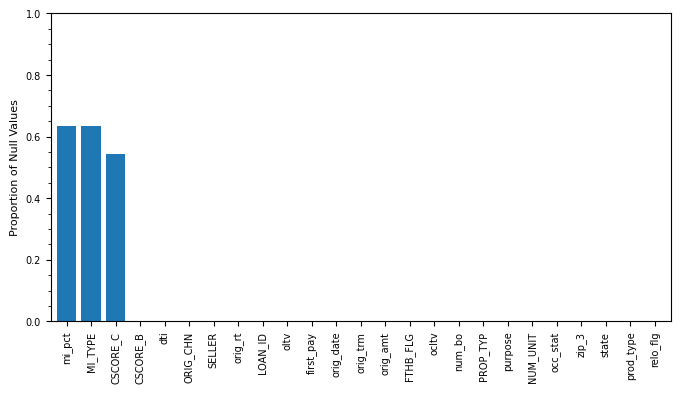

In [8]:
df = acquisitionFile
ax = df.isnull().sum().divide(len(df)).sort_values(ascending=False).plot.bar(width=0.8, figsize=(8, 4), fontsize=7)

ax.set_ylim(0, 1)

ax.minorticks_on()
ax.xaxis.set_tick_params(which='minor', bottom=False)
ax.yaxis.set_tick_params(which='minor', bottom=True)

ax.set_ylabel('Proportion of Null Values', fontsize=8);
# Matches with the exported csv file

print(f"""
    Number rows: {df.shape[0]}
    Number columns: {df.shape[1]}
    Number null columns: {((df.isnull().sum()/len(df)) == 1).sum()}
""")

In [9]:
# Prepare the Performance variables
performanceFile = lppub_base[[
    'LOAN_ID', 'ACT_PERIOD', 'SERVICER', 'CURR_RATE', 'CURRENT_UPB', 'LOAN_AGE', 'REM_MONTHS', 'ADJ_REM_MONTHS', 
    'MATR_DT', 'MSA', 'DLQ_STATUS', 'MOD_FLAG', 'Zero_Bal_Code', 'ZB_DTE', 'LAST_PAID_INSTALLMENT_DATE', 
    'FORECLOSURE_DATE', 'DISPOSITION_DATE', 'FORECLOSURE_COSTS', 'PROPERTY_PRESERVATION_AND_REPAIR_COSTS', 
    'ASSET_RECOVERY_COSTS', 'MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS', 'ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY', 
    'NET_SALES_PROCEEDS', 'CREDIT_ENHANCEMENT_PROCEEDS', 'REPURCHASES_MAKE_WHOLE_PROCEEDS', 'OTHER_FORECLOSURE_PROCEEDS', 
    'NON_INTEREST_BEARING_UPB', 'PRINCIPAL_FORGIVENESS_AMOUNT', 'repch_flag', 'LAST_UPB'
]].rename(columns={
    'ACT_PERIOD': 'period', 'SERVICER': 'servicer', 'CURR_RATE': 'curr_rte', 'CURRENT_UPB': 'act_upb', 
    'LOAN_AGE': 'loan_age', 'REM_MONTHS': 'rem_mths', 'ADJ_REM_MONTHS': 'adj_rem_months', 'MATR_DT': 'maturity_date', 
    'MSA': 'msa', 'DLQ_STATUS': 'dlq_status', 'MOD_FLAG': 'mod_ind', 'Zero_Bal_Code': 'z_zb_code', 
    'ZB_DTE': 'zb_date', 'LAST_PAID_INSTALLMENT_DATE': 'lpi_dte', 'FORECLOSURE_DATE': 'fcc_dte', 
    'DISPOSITION_DATE': 'disp_dte', 'FORECLOSURE_COSTS': 'FCC_COST', 'PROPERTY_PRESERVATION_AND_REPAIR_COSTS': 'PP_COST', 
    'ASSET_RECOVERY_COSTS': 'AR_COST', 'MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS': 'IE_COST', 
    'ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY': 'TAX_COST', 'NET_SALES_PROCEEDS': 'NS_PROCS', 
    'CREDIT_ENHANCEMENT_PROCEEDS': 'CE_PROCS', 'REPURCHASES_MAKE_WHOLE_PROCEEDS': 'RMW_PROCS', 
    'OTHER_FORECLOSURE_PROCEEDS': 'O_PROCS', 'NON_INTEREST_BEARING_UPB': 'non_int_upb', 
    'PRINCIPAL_FORGIVENESS_AMOUNT': 'prin_forg_upb', 'LAST_UPB': 'zb_upb'
})

# period: The month and year that pertains to the servicer’s cut-off period for mortgage loan information.
# servicer: The name of the entity that serves as the primary servicer of the mortgage loan.
# curr_rte: The rate of interest in effect for the periodic installment due.
# act_upb: The current actual outstanding unpaid principal balance of a mortgage loan, reflective of payments actually received from the related borrower.
# loan_age: The number of calendar months since the mortgage loan's origination date. 
# rem_mths: The number of calendar months remaining until the mortgage loan is due to be paid in full based on the maturity date as defined in documents.
# adj_rem_months: The number of calendar months remaining until the outstanding unpaid principal balance of the mortgage loan amortizes to a zero balance, 
#                 taking into account any additional prepayments, which could lead to the loan paying off earlier than its maturity date.
# maturity_date: The month and year in which a mortgage loan is scheduled to be paid in full as defined in the mortgage loan documents.
# msa: The numeric Metropolitan Statistical Area Code for the property securing the mortgage loan. 
# dlq_status: The number of months the obligor is delinquent as determined by the governing mortgage documents.
# mod_ind: An indicator that denotes if the mortgage loan has been modified.
# z_zb_code: A code indicating the reason the loan's balance was reduced to zero or experienced a credit event, if applicable.
# zb_date: Date on which the mortgage loan balance was reduced to zero.
# lpi_dte: The due date of the last paid installment that was collected for the mortgage loan.
# fcc_dte: The date on which the completion of the legal action of foreclosure occurred.
# disp_dte: The date on which Fannie Mae’s interest in a property ends through either the transfer of the property to a third party or the satisfaction of the mortgage obligation.
# FCC_COST: Expenses associated with obtaining title to property from the mortgagor, valuing the property, and maintaining utility services to the property.
# PP_COST: The expenses associated with securing and preserving the property including two major categories: maintenance and repairs. 
# AR_COST: Expenses associated with removing occupants and personal property from an occupied property post foreclosure. 
# IE_COST: Expenses and credits associated with preserving the property.
# TAX_COST: Payment of taxes associated with holding the property.
# NS_PROCS: Total cash received from the sale of the property net of any applicable selling expenses, such as fees and commissions.
# CE_PROCS: Proceeds from claims on primary and certain other limited mortgage insurance policies, and recourse and indemnification payments
#           from lenders under arrangements designed to limit credit exposure to Fannie Mae.
# RMW_PROCS: Amounts received by Fannie Mae under the terms of our representation and warranty arrangements for the repurchase of the mortgage
#            loan or the subject property or loss reimbursement subsequent to property disposition.
# O_PROCS: Amounts, other than sale proceeds, received by Fannie Mae following foreclosure of a property, including redemption proceeds received from the mortgagor.
# non_int_upb: A portion of the UPB that will not accrue interest as a result of an eligible loan modification.
# prin_forg_upb: A reduction of the UPB owed on a mortgage by a borrower that is formally agreed to by the lender and the borrower.
# zb_upb: The unpaid principal balance of the loan at the time of removal.


# Now performanceFile is 2,115,845 rows × 30 columns
# Remove the original base DataFrame to save memory
del lppub_base

In [10]:
# Create AQSN_DTE field from filename
acquisition_year = file_name[:4]
acquisition_qtr = file_name[4:6]

performanceFile['servicer'] = performanceFile['servicer'].astype(str)
performanceFile['z_zb_code'] = performanceFile['z_zb_code'].astype(str)

# performanceFile['maturity_date'] = performanceFile['maturity_date'].astype(str)
# performanceFile['zb_date'] = performanceFile['zb_date'].astype(str)
# performanceFile['lpi_dte'] = performanceFile['lpi_dte'].astype(str)
# performanceFile['fcc_dte'] = performanceFile['fcc_dte'].astype(str)
# performanceFile['disp_dte'] = performanceFile['disp_dte'].astype(str)

if acquisition_qtr == 'Q1':
    acquisition_month = '03'
elif acquisition_qtr == 'Q2':
    acquisition_month = '06'
elif acquisition_qtr == 'Q3':
    acquisition_month = '09'
else:
    acquisition_month = '12'

acquisition_date = f"{acquisition_year}-{acquisition_month}-01"  # 2023-09-01

# Convert all date fields to YYYY-MM-DD format
acquisitionFile = acquisitionFile.rename(columns={
    'orig_date': 'ORIG_DTE',
    'first_pay': 'FRST_DTE'
})
# Old format: 7/1/2023  12:00:00 AM. New format: 7/1/2023
acquisitionFile['ORIG_DTE'] = pd.to_datetime(acquisitionFile['ORIG_DTE'])
acquisitionFile['FRST_DTE'] = pd.to_datetime(acquisitionFile['FRST_DTE'])
performanceFile['period'] = pd.to_datetime(performanceFile['period'])
performanceFile['maturity_date'] = pd.to_datetime(performanceFile['maturity_date'])
performanceFile['zb_date'] = pd.to_datetime(performanceFile['zb_date'])
performanceFile['lpi_dte'] = pd.to_datetime(performanceFile['lpi_dte'])
performanceFile['fcc_dte'] = pd.to_datetime(performanceFile['fcc_dte'])
performanceFile['disp_dte'] = pd.to_datetime(performanceFile['disp_dte'])

#performanceFile['maturity_date'] = np.where(performanceFile['maturity_date'] != '', 
#                                            pd.to_datetime(performanceFile['maturity_date'].str[2:6] + '-' + performanceFile['maturity_date'].str[0:2] + '-01', errors='coerce'), 
#                                            performanceFile['maturity_date'])

#performanceFile['zb_date'] = np.where(performanceFile['zb_date'] != '', 
#                                      pd.to_datetime(performanceFile['zb_date'].str[2:6] + '-' + performanceFile['zb_date'].str[0:2] + '-01', errors='coerce'), 
#                                      performanceFile['zb_date'])

#performanceFile['lpi_dte'] = np.where(performanceFile['lpi_dte'] != '', 
#                                      pd.to_datetime(performanceFile['lpi_dte'].str[2:6] + '-' + performanceFile['lpi_dte'].str[0:2] + '-01', errors='coerce'), 
#                                      performanceFile['lpi_dte'])

#performanceFile['fcc_dte'] = np.where(performanceFile['fcc_dte'] != '', 
#                                      pd.to_datetime(performanceFile['fcc_dte'].str[2:6] + '-' + performanceFile['fcc_dte'].str[0:2] + '-01', errors='coerce'), 
#                                      performanceFile['fcc_dte'])

#performanceFile['disp_dte'] = np.where(performanceFile['disp_dte'] != '', 
#                                       pd.to_datetime(performanceFile['disp_dte'].str[2:6] + '-' + performanceFile['disp_dte'].str[0:2] + '-01', errors='coerce'), 
#                                       performanceFile['disp_dte'])

In [11]:
# Create the acquisition_date variable based on your previous logic
# acquisition_date was generated earlier
# Assuming acquisition_date is already defined in the previous step.

# Create the first base table with a copy of acquisition fields plus AQSN_DTE field and recodes of MI_TYPE and OCLTV
baseTable1 = acquisitionFile.copy()

# Add AQSN_DTE field
baseTable1['AQSN_DTE'] = acquisition_date

# Recode MI_TYPE to be more descriptive
baseTable1['MI_TYPE'] = baseTable1['MI_TYPE'].replace({
    '1': 'BPMI',  # Borrower Paid Mortgage Insurance
    '2': 'LPMI',  # Lender Paid Mortgage Insurance
    '3': 'IPMI'   # Investor Paid Mortgage Insurance
}).fillna('None')

# If OCLTV is missing, replace it with OLTV
baseTable1['ocltv'] = np.where(baseTable1['ocltv'].isna(), baseTable1['oltv'], baseTable1['ocltv'])

len(baseTable1)
print("Number of missing servicers ", performanceFile['servicer'].isna().sum())

Number of missing servicers  0


In [12]:
#temp_file_name = f"acq.csv"
#acquisitionFile.to_csv(temp_file_name, sep=",", na_rep="NULL", float_format='%.2f', index=False, quoting=1)  # 47.3 MB
#temp_file_name = f"per.csv"
#performanceFile.to_csv(temp_file_name, sep=",", na_rep="NULL", float_format='%.2f', index=False, quoting=1)  # 479 MB

### Export baseTable1 (266,728 rows × 26 columns)
#temp_file_name = f"baseTable1.csv"
#baseTable1.to_csv(temp_file_name, sep=",", na_rep="NULL", float_format='%.2f', index=False, quoting=1)  # 50.9 MB

In [13]:
# Create the second base table with the latest-available or aggregated data from the Performance fields

# LAST_ACTIVITY_DATE table: Get the latest activity date for each loan
last_act_dte_table = performanceFile.groupby('LOAN_ID').agg(LAST_ACTIVITY_DATE=('period', 'max')).reset_index()

# LAST_UPB table: Get the latest UPB for each loan, replacing with zb_upb if not missing
last_upb_table = (performanceFile.groupby('LOAN_ID')
                  .apply(lambda x: x.loc[x['period'].idxmax()])
                  .assign(LAST_UPB=lambda x: np.where(pd.notna(x['zb_upb']), x['zb_upb'], x['act_upb']))
                  [['LOAN_ID', 'LAST_UPB']]
                  .reset_index(drop=True))

# LAST_RT table: Get the latest interest rate for each loan
last_rt_table = (performanceFile[performanceFile['curr_rte'].notna()]
                 .groupby('LOAN_ID').agg(LAST_RT_DATE=('period', 'max')).reset_index()
                 .merge(performanceFile, how='left', left_on=['LOAN_ID', 'LAST_RT_DATE'], right_on=['LOAN_ID', 'period'])
                 [['LOAN_ID', 'curr_rte']]
                 .rename(columns={'curr_rte': 'LAST_RT'})
                 .assign(LAST_RT=lambda x: x['LAST_RT'].round(3)))

# zb_code_table: Get the zero-balance code for each loan
zb_code_table = (performanceFile[performanceFile['z_zb_code'] != 'nan']
                 .groupby('LOAN_ID').agg(zb_code_dt=('period', 'max')).reset_index()
                 .merge(performanceFile, how='left', left_on=['LOAN_ID', 'zb_code_dt'], right_on=['LOAN_ID', 'period'])
                 [['LOAN_ID', 'z_zb_code']]
                 .rename(columns={'z_zb_code': 'zb_code'}))

# Merge the tables together (266,728 rows × 34 columns)
max_table = (last_act_dte_table
             .merge(performanceFile, how='left', left_on=['LOAN_ID', 'LAST_ACTIVITY_DATE'], right_on=['LOAN_ID', 'period'])
             .merge(last_upb_table, how='left', on='LOAN_ID')
             .merge(last_rt_table, how='left', on='LOAN_ID')
             .merge(zb_code_table, how='left', on='LOAN_ID'))

# Remove intermediate tables to save memory
del last_act_dte_table, last_upb_table, last_rt_table, zb_code_table

# servicer_table: Get the latest servicer for each loan
servicer_table = (performanceFile[performanceFile['servicer'] != 'nan']
                  .groupby('LOAN_ID').agg(servicer_period=('period', 'max')).reset_index()
                  .merge(performanceFile, how='left', left_on=['LOAN_ID', 'servicer_period'], right_on=['LOAN_ID', 'period'])
                  .assign(SERVICER=lambda x: x['servicer'])
                  [['LOAN_ID', 'SERVICER']])

# non_int_upb_table: Get the second-to-last non-interest UPB for each loan
non_int_upb_table = (performanceFile.groupby('LOAN_ID')
                     .apply(lambda x: x.iloc[-2] if len(x) > 1 else x.iloc[-1])
                     .reset_index(drop=True)[['LOAN_ID', 'non_int_upb']]
                     .rename(columns={'non_int_upb': 'NON_INT_UPB'})
                     .assign(NON_INT_UPB=lambda x: np.where(x['NON_INT_UPB'].isna(), 0, x['NON_INT_UPB'])))

# Merge all the tables into baseTable2
baseTable2 = (baseTable1
              .merge(max_table, how='left', on='LOAN_ID')
              .merge(servicer_table, how='left', on='LOAN_ID')
              .merge(non_int_upb_table, how='left', on='LOAN_ID'))
len(baseTable2)

del max_table, servicer_table, non_int_upb_table

C:\Users\Oreki\AppData\Local\Temp\ipykernel_31700\943649807.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.loc[x['period'].idxmax()])
C:\Users\Oreki\AppData\Local\Temp\ipykernel_31700\943649807.py:47: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.iloc[-2] if len(x) > 1 else x.iloc[-1])


In [14]:
### Export baseTable2 (266,728 rows × 61 columns)
# 26 + 34 -1 + 2 = 61
#temp_file_name = f"baseTable2.csv"
#baseTable2.to_csv(temp_file_name, sep=",", na_rep="NULL", float_format='%.2f', index=False, quoting=1)  # 125 MB

### 1-26: baseTable1
### 27: LAST_ACTIVITY_DATE
### 28-56: performanceFile
### 57-61: LAST_UPB, LAST_RT, zb_code, SERVICER, NON_INT_UPB

fcc_table: This table is generated by filtering rows that have all three date columns (lpi_dte, fcc_dte, disp_dte) not missing, then grouping by LOAN_ID to get the maximum of each date.

slimPerformanceFile: This is a trimmed version of performanceFile with selected columns. dlq_status is converted to numeric, replacing 'XX' with '999'.

First Delinquency Occurrence Tables (F30, F60, F90, F120, F180): These tables track the first occurrence of loans becoming delinquent at 30, 60, 90, 120, and 180 days. Grouping and filtering logic is similar to the original R code.

Loan Modification Tables (fmod_table): Identifies the first modification date for each loan and retrieves UPB values.

Computing NUM_PERIODS_120: This field is calculated by comparing the first delinquency date (F120_DTE) to the origination date (FRST_DTE).

Term Change (MODTRM_CHNG) and UPB Change (MODUPB_CHNG) Fields: These fields track changes in loan terms and balances due to modifications.

In [15]:
# Create the third base table with the latest-available foreclosure/disposition data
fcc_table = performanceFile.dropna(subset=['lpi_dte', 'fcc_dte', 'disp_dte'])

fcc_table = (fcc_table.groupby('LOAN_ID')
             .agg(LPI_DTE=('lpi_dte', 'max'), FCC_DTE=('fcc_dte', 'max'), DISP_DTE=('disp_dte', 'max'))
             .reset_index())

baseTable3 = baseTable2.merge(fcc_table, how='left', on='LOAN_ID')  # 266,728 rows × 64 columns

# Remove intermediate tables to save memory
del fcc_table, baseTable2

In [16]:
# Create the series of "first DQ occurrence" tables and loan modification tables
slimPerformanceFile = (performanceFile[['LOAN_ID', 'period', 'dlq_status', 'z_zb_code', 'act_upb', 'zb_upb', 'mod_ind', 'maturity_date', 'rem_mths']]
                       .copy())

slimPerformanceFile['dlq_status'] = slimPerformanceFile['dlq_status'].replace('XX', '999').astype(int)

# F30 table  (6830 rows, Date & UPB)
f30_table = (slimPerformanceFile[(slimPerformanceFile['dlq_status'] >= 1) & (slimPerformanceFile['dlq_status'] < 999) & (slimPerformanceFile['z_zb_code'] == 'nan')]
             .groupby('LOAN_ID').agg(F30_DTE=('period', 'min')).reset_index()
             .merge(slimPerformanceFile, how='left', left_on=['LOAN_ID', 'F30_DTE'], right_on=['LOAN_ID', 'period'])
             [['LOAN_ID', 'F30_DTE', 'act_upb']]
             .rename(columns={'act_upb': 'F30_UPB'}))

# F60 table  (1000 rows, Date & UPB)
f60_table = (slimPerformanceFile[(slimPerformanceFile['dlq_status'] >= 2) & (slimPerformanceFile['dlq_status'] < 999) & (slimPerformanceFile['z_zb_code'] == 'nan')]
             .groupby('LOAN_ID').agg(F60_DTE=('period', 'min')).reset_index()
             .merge(slimPerformanceFile, how='left', left_on=['LOAN_ID', 'F60_DTE'], right_on=['LOAN_ID', 'period'])
             [['LOAN_ID', 'F60_DTE', 'act_upb']]
             .rename(columns={'act_upb': 'F60_UPB'}))

# F90 table  (450 rows, Date & UPB)
f90_table = (slimPerformanceFile[(slimPerformanceFile['dlq_status'] >= 3) & (slimPerformanceFile['dlq_status'] < 999) & (slimPerformanceFile['z_zb_code'] == 'nan')]
             .groupby('LOAN_ID').agg(F90_DTE=('period', 'min')).reset_index()
             .merge(slimPerformanceFile, how='left', left_on=['LOAN_ID', 'F90_DTE'], right_on=['LOAN_ID', 'period'])
             [['LOAN_ID', 'F90_DTE', 'act_upb']]
             .rename(columns={'act_upb': 'F90_UPB'}))

# F120 table  (257 rows, Date & UPB)
f120_table = (slimPerformanceFile[(slimPerformanceFile['dlq_status'] >= 4) & (slimPerformanceFile['dlq_status'] < 999) & (slimPerformanceFile['z_zb_code'] == 'nan')]
              .groupby('LOAN_ID').agg(F120_DTE=('period', 'min')).reset_index()
              .merge(slimPerformanceFile, how='left', left_on=['LOAN_ID', 'F120_DTE'], right_on=['LOAN_ID', 'period'])
              [['LOAN_ID', 'F120_DTE', 'act_upb']]
              .rename(columns={'act_upb': 'F120_UPB'}))

# F180 table  (84 rows, Date & UPB)
f180_table = (slimPerformanceFile[(slimPerformanceFile['dlq_status'] >= 6) & (slimPerformanceFile['dlq_status'] < 999) & (slimPerformanceFile['z_zb_code'] == 'nan')]
              .groupby('LOAN_ID').agg(F180_DTE=('period', 'min')).reset_index()
              .merge(slimPerformanceFile, how='left', left_on=['LOAN_ID', 'F180_DTE'], right_on=['LOAN_ID', 'period'])
              [['LOAN_ID', 'F180_DTE', 'act_upb']]
              .rename(columns={'act_upb': 'F180_UPB'}))

# FCE table  (86 rows, Date & UPB)
fce_table = (slimPerformanceFile[((slimPerformanceFile['z_zb_code'].isin(['02', '03', '09', '15'])) | (slimPerformanceFile['dlq_status'] >= 6)) & (slimPerformanceFile['dlq_status'] < 999)]
             .groupby('LOAN_ID').agg(FCE_DTE=('period', 'min')).reset_index()
             .merge(slimPerformanceFile, how='left', left_on=['LOAN_ID', 'FCE_DTE'], right_on=['LOAN_ID', 'period'])
             [['LOAN_ID', 'FCE_DTE', 'act_upb', 'zb_upb']]
             .assign(FCE_UPB=lambda x: x['zb_upb'] + x['act_upb'])
             [['LOAN_ID', 'FCE_DTE', 'FCE_UPB']])

In [17]:
# FMOD table logic fix

# Ensure 'period' and 'FMOD_DTE' are strings before extracting year and month

fmod_dte_table = (slimPerformanceFile[(slimPerformanceFile['mod_ind'] == 'Y') & (slimPerformanceFile['z_zb_code'] == 'nan')]
                  .groupby('LOAN_ID').agg(FMOD_DTE=('period', 'min')).reset_index())

# Convert 'period' and 'FMOD_DTE' to year and month integers
slimPerformanceFile['period_year'] = slimPerformanceFile['period'].dt.year
slimPerformanceFile['period_month'] = slimPerformanceFile['period'].dt.month

fmod_dte_table['FMOD_DTE_year'] = fmod_dte_table['FMOD_DTE'].dt.year
fmod_dte_table['FMOD_DTE_month'] = fmod_dte_table['FMOD_DTE'].dt.month

# Merge slimPerformanceFile with fmod_dte_table
# 3 rows; fmod_date, fmod_UPB, maturity_date
fmod_table = (slimPerformanceFile[(slimPerformanceFile['mod_ind'] == 'Y') & (slimPerformanceFile['z_zb_code'] == 'nan')]
              .merge(fmod_dte_table, how='left', on='LOAN_ID'))

# Create a new column to calculate the difference in months
fmod_table['period_total_months'] = fmod_table['period_year'] * 12 + fmod_table['period_month']
fmod_table['FMOD_DTE_total_months'] = fmod_table['FMOD_DTE_year'] * 12 + fmod_table['FMOD_DTE_month']

# Apply the filter for 3 months window
fmod_table = fmod_table[fmod_table['period_total_months'] <= fmod_table['FMOD_DTE_total_months'] + 3]

# Group by 'LOAN_ID' and get the max UPB
fmod_table = (fmod_table.groupby('LOAN_ID')
              .agg(FMOD_UPB=('act_upb', 'max'))
              .reset_index())

# Merge the rest of the necessary columns
fmod_table = (fmod_table.merge(fmod_dte_table, how='left', on='LOAN_ID')
              .merge(slimPerformanceFile, how='left', left_on=['LOAN_ID', 'FMOD_DTE'], right_on=['LOAN_ID', 'period'])
              [['LOAN_ID', 'FMOD_DTE', 'FMOD_UPB', 'maturity_date']])
# Remove intermediate FMOD date table
del fmod_dte_table

# Ensure 'F120_DTE' and 'FRST_DTE' are strings before extracting year and month
f120_table['F120_DTE'] = f120_table['F120_DTE']
acquisitionFile['FRST_DTE'] = acquisitionFile['FRST_DTE']

# Compute NUM_PERIODS_120 field
num_120_table = (f120_table.merge(acquisitionFile, how='left', on='LOAN_ID')
                 .assign(z_num_periods_120=lambda x: (((x['F120_DTE'].dt.year * 12 + x['F120_DTE'].dt.month) -
                                                        (x['FRST_DTE'].dt.year * 12 + x['FRST_DTE'].dt.month) + 1)))
                 [['LOAN_ID', 'z_num_periods_120']])

del acquisitionFile

In [18]:
# Compute MODTRM_CHNG field
orig_maturity_table = (slimPerformanceFile.dropna(subset=['maturity_date'])
                       .groupby('LOAN_ID').agg(maturity_date_period=('period', 'min')).reset_index()
                       .merge(slimPerformanceFile, how='left', left_on=['LOAN_ID', 'maturity_date_period'], right_on=['LOAN_ID', 'period'])
                       [['LOAN_ID', 'maturity_date']]
                       .rename(columns={'maturity_date': 'orig_maturity_date'}))  # LOAN_ID here is a column label

### Is it correct to have two groupby? - Solved
# 'LOAN_ID' is both an index level and a column label, which is ambiguous.
# Need to reset index before the second groupby. 

trm_chng_table = (slimPerformanceFile.groupby('LOAN_ID')                                         # 10 variables
                  .apply(lambda x: x.assign(prev_rem_mths=x['rem_mths'].shift(1)))               # 2,115,845 rows grouped by LOAN_ID with prev_rem_mths
                  .assign(trm_chng=lambda x: x['rem_mths'] - x['prev_rem_mths'],                 # 2,115,845 rows with trm_chng & did_trm_chng
                          did_trm_chng=lambda x: np.where(x['trm_chng'].fillna(-1) >= 0, 1, 0))  # fill the induced na with -1
                  .query('did_trm_chng == 1')  # Filter the changes in loan terms. There are 6 LOAN_ID
                  .set_index("LOAN_ID")        # Reset index so that LOAN_ID is no longer a column label
                  .groupby('LOAN_ID').agg(trm_chng_dt=('period', 'min')).reset_index())          # Add term change date


C:\Users\Oreki\AppData\Local\Temp\ipykernel_31700\2545941397.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.assign(prev_rem_mths=x['rem_mths'].shift(1)))               # 2,115,845 rows grouped by LOAN_ID with prev_rem_mths


In [19]:
modtrm_table = (fmod_table.merge(orig_maturity_table, how='left', on='LOAN_ID')
                .merge(trm_chng_table, how='left', on='LOAN_ID')
                .assign(MODTRM_CHNG=lambda x: np.where((x['maturity_date'] != x['orig_maturity_date']) | x['trm_chng_dt'].notna(), 1, 0))
                [['LOAN_ID', 'MODTRM_CHNG']])


# Compute MODTRM_UPB field
pre_mod_upb_table = (slimPerformanceFile.merge(fmod_table, how='left', on='LOAN_ID')
                     .query('period < FMOD_DTE')
                     .groupby('LOAN_ID').agg(pre_mod_period=('period', 'max')).reset_index()
                     .merge(slimPerformanceFile, how='left', left_on=['LOAN_ID', 'pre_mod_period'], right_on=['LOAN_ID', 'period'])
                     [['LOAN_ID', 'act_upb']]
                     .rename(columns={'act_upb': 'pre_mod_upb'}))

modupb_table = (fmod_table.merge(pre_mod_upb_table, how='left', on='LOAN_ID')
                .assign(MODUPB_CHNG=lambda x: np.where(x['FMOD_UPB'] >= x['pre_mod_upb'], 1, 0))
                [['LOAN_ID', 'MODUPB_CHNG']])

slimPerformanceFile['mod_ind'].unique()

array(['N', nan], dtype=object)

Explanation:

Merge Tables: In pandas, merge() is used to join tables by LOAN_ID. We use how='left' to perform left joins, similar to how it's done in R's left_join().

Conditional Updates: The .assign() method in pandas allows for column-wise assignment. np.where() is used to conditionally assign values to the UPB columns (F30_UPB, F60_UPB, etc.). The condition checks if the UPB value is missing (isna()) but the corresponding date (F30_DTE, etc.) is not missing, and if so, it replaces the UPB value with orig_amt.

Removing Intermediate Tables: Similar to R's rm(), del is used in Python to remove the intermediate tables to free up memory.

In [20]:
# Create the fourth base table by joining the first-DQ-occurrence and loan modification tables
baseTable4 = (baseTable3
              .merge(f30_table, how='left', on='LOAN_ID')
              .merge(f60_table, how='left', on='LOAN_ID')
              .merge(f90_table, how='left', on='LOAN_ID')
              .merge(f120_table, how='left', on='LOAN_ID')
              .merge(f180_table, how='left', on='LOAN_ID')
              .merge(fce_table, how='left', on='LOAN_ID')
              .merge(fmod_table, how='left', on='LOAN_ID')
              .merge(num_120_table, how='left', on='LOAN_ID')
              .merge(modtrm_table, how='left', on='LOAN_ID')
              .merge(modupb_table, how='left', on='LOAN_ID')
              .assign(
                  F30_UPB=lambda x: np.where(x['F30_UPB'].isna() & x['F30_DTE'].notna(), x['orig_amt'], x['F30_UPB']),
                  F60_UPB=lambda x: np.where(x['F60_UPB'].isna() & x['F60_DTE'].notna(), x['orig_amt'], x['F60_UPB']),
                  F90_UPB=lambda x: np.where(x['F90_UPB'].isna() & x['F90_DTE'].notna(), x['orig_amt'], x['F90_UPB']),
                  F120_UPB=lambda x: np.where(x['F120_UPB'].isna() & x['F120_DTE'].notna(), x['orig_amt'], x['F120_UPB']),
                  F180_UPB=lambda x: np.where(x['F180_UPB'].isna() & x['F180_DTE'].notna(), x['orig_amt'], x['F180_UPB']),
                  FCE_UPB=lambda x: np.where(x['FCE_UPB'].isna() & x['FCE_DTE'].notna(), x['orig_amt'], x['FCE_UPB'])
              ))

# Remove intermediate tables to save memory
del baseTable3, f30_table, f60_table, f90_table, f120_table, f180_table, fce_table, fmod_table, num_120_table, modtrm_table, modupb_table
del orig_maturity_table, trm_chng_table
del slimPerformanceFile
del pre_mod_upb_table

In [21]:
### Export baseTable4 (266,728 rows × 82 columns)
#temp_file_name = f"baseTable4.csv"
#baseTable4.to_csv(temp_file_name, sep=",", na_rep="NULL", float_format='%.2f', index=False, quoting=1)  # 162 MB

### 1-61: baseTable2
### 1-64: baseTable3
### 65-76: First Delinquency Occurrence Tables
### 77-79: Loan Modification Tables
### 80: NUM_PERIODS_120
### 81-82: Term Change and UPB Change

In [22]:
# First assignment without PFG_COST
baseTable4['disp_dte'] = baseTable4['disp_dte'].fillna(value=np.nan)
baseTable4['disp_dte'] = pd.to_datetime(baseTable4['disp_dte'], errors='coerce')
# Fannie Mae’s interest in a property ends through either the transfer of the property to a third party or the satisfaction of the mortgage obligation.
baseTable4['LPI_DTE'] = pd.to_datetime(baseTable4['LPI_DTE'], errors='coerce')
# The due date of the last paid installment that was collected for the mortgage loan.

baseTable5 = (baseTable4
              .assign(
                  LAST_DTE=lambda x: np.where(~np.isnan(x['disp_dte']) , x['disp_dte'], x['LAST_ACTIVITY_DATE']),
                  repch_flag=lambda x: np.where(x['repch_flag'] == 'Y', 1, 0),
                  PFG_COST=lambda x: x['prin_forg_upb'],                           # PRINCIPAL_FORGIVENESS_AMOUNT
                  MOD_FLAG=lambda x: np.where(x['FMOD_DTE'].notna(), 1, 0),        # First modification date exists
                  MODFG_COST=lambda x: np.where(x['mod_ind'] == 'Y', 0, np.nan),   # Mortgage loan has been modified (?)
                  MODTRM_CHNG=lambda x: x['MODTRM_CHNG'].fillna(0),
                  MODUPB_CHNG=lambda x: x['MODUPB_CHNG'].fillna(0),
                  CSCORE_MN=lambda x: np.where(x['CSCORE_C'].notna() & x['CSCORE_B'].notna() & (x['CSCORE_C'] < x['CSCORE_B']), x['CSCORE_C'], x['CSCORE_B']),
                  ORIG_VAL=lambda x: round(x['orig_amt'] / (x['oltv'] / 100), 2),  # value of the property
                  dlq_status=lambda x: np.where(x['dlq_status'].isin(['X', 'XX']), '999', x['dlq_status']),
                  z_last_status=lambda x: x['dlq_status'].astype(float),           # The number of months the obligor is delinquent
                  LAST_STAT=lambda x: np.select(
                      [
                          x['zb_code'] == '09', x['zb_code'] == '03', x['zb_code'] == '02', 
                          x['zb_code'] == '06', x['zb_code'] == '15', x['zb_code'] == '16', 
                          x['zb_code'] == '01', (x['z_last_status'] < 999) & (x['z_last_status'] >= 9), 
                          x['z_last_status'] == 8, x['z_last_status'] == 7, x['z_last_status'] == 6,
                          x['z_last_status'] == 5, x['z_last_status'] == 4, x['z_last_status'] == 3,
                          x['z_last_status'] == 2, x['z_last_status'] == 1, x['z_last_status'] == 0
                      ],
                      ['F', 'S', 'T', 'R', 'N', 'L', 'P', '9', '8', '7', '6', '5', '4', '3', '2', '1', 'C'],
                      default='X'
                  ),
                  # 09 = Deed-in-Lieu; REO Disposition.     03 = Short Sale.     02 = Third Party Sale
                  # 06 = Repurchased.     15 = Non Performing Note Sale.     16 = Reperforming Note Sale. 
                  # 01 = Prepaid or Matured. 
                  FCC_DTE=lambda x: np.where(pd.isna(x['FCC_DTE']) & (x['LAST_STAT'].isin(['F', 'S', 'N', 'T'])), x['zb_date'], x['FCC_DTE']),
                  COMPLT_FLG=lambda x: np.where(~pd.isna(x['DISP_DTE']), 1, np.nan),
                  INT_COST=lambda x: np.where(
                      (x['COMPLT_FLG'] == 1) & (~pd.isna(x['LPI_DTE'])),
                      round(((x['LAST_DTE'].dt.year * 12 + x['LAST_DTE'].dt.month) -
                             (x['LPI_DTE'].dt.year * 12 + x['LPI_DTE'].dt.month)) *
                            ((x['LAST_RT'] / 100) - 0.0035) / 12 * (x['LAST_UPB'] + (-1 * x['NON_INT_UPB'])), 2),
                      np.nan
                  ),
                  FCC_COST=lambda x: np.where((x['COMPLT_FLG'] == 1) & x['FCC_COST'].isna(), 0, x['FCC_COST']),
                  PP_COST=lambda x: np.where((x['COMPLT_FLG'] == 1) & x['PP_COST'].isna(), 0, x['PP_COST']),
                  AR_COST=lambda x: np.where((x['COMPLT_FLG'] == 1) & x['AR_COST'].isna(), 0, x['AR_COST']),
                  IE_COST=lambda x: np.where((x['COMPLT_FLG'] == 1) & x['IE_COST'].isna(), 0, x['IE_COST']),
                  TAX_COST=lambda x: np.where((x['COMPLT_FLG'] == 1) & x['TAX_COST'].isna(), 0, x['TAX_COST'])
              ))

baseTable5 = (baseTable5
              .assign(INT_COST=lambda x: np.where((x['COMPLT_FLG'] == 1) & x['INT_COST'].isna(), 0, x['INT_COST'])))

# Second assignment focusing on PFG_COST
baseTable5 = (baseTable5
              .assign(
                  CSCORE_MN=lambda x: np.where(x['CSCORE_MN'].isna(), x['CSCORE_B'], x['CSCORE_MN']),
                  MODFG_COST=lambda x: np.where((x['mod_ind'] == 'Y') & (x['PFG_COST'] > 0), x['PFG_COST'], 0),
                  PFG_COST=lambda x: np.where((x['COMPLT_FLG'] == 1) & x['PFG_COST'].isna(), 0, x['PFG_COST']),
                  COMPLT_FLG=lambda x: np.where(~x['LAST_STAT'].isin(['F', 'S', 'N', 'T']), np.nan, x['COMPLT_FLG']),
                  CE_PROCS=lambda x: np.where((x['COMPLT_FLG'] == 1) & x['CE_PROCS'].isna(), 0, x['CE_PROCS']),
                  NS_PROCS=lambda x: np.where((x['COMPLT_FLG'] == 1) & x['NS_PROCS'].isna(), 0, x['NS_PROCS']),
                  RMW_PROCS=lambda x: np.where((x['COMPLT_FLG'] == 1) & x['RMW_PROCS'].isna(), 0, x['RMW_PROCS']),
                  O_PROCS=lambda x: np.where((x['COMPLT_FLG'] == 1) & x['O_PROCS'].isna(), 0, x['O_PROCS']),
                  NET_LOSS=lambda x: np.round(np.where(
                      x['COMPLT_FLG'] == 1,
                      (x['LAST_UPB'] + x['FCC_COST'] + x['PP_COST'] + x['AR_COST'] + x['IE_COST'] +
                       x['TAX_COST'] + x['PFG_COST'] + x['INT_COST'] + -1 * x['NS_PROCS'] + -1 * x['CE_PROCS'] +
                       -1 * x['RMW_PROCS'] + -1 * x['O_PROCS']), np.nan), 2),
                  NET_SEV=lambda x: np.round(np.where(x['COMPLT_FLG'] == 1, x['NET_LOSS'] / x['LAST_UPB'], np.nan), 6)
              ))

baseTable5 = (baseTable5
              .assign(CSCORE_MN=lambda x: np.where(x['CSCORE_MN'].isna(), x['CSCORE_C'], x['CSCORE_MN'])))

In [23]:
### Export baseTable5 (266,728 rows × 94 columns)
#temp_file_name = f"baseTable5.csv"
#baseTable5.to_csv(temp_file_name, sep=",", na_rep="NULL", float_format='%.2f', index=False, quoting=1)  # 185 MB
# LAST_DTE,  PFG_COST,  MOD_FLAG,  MODFG_COST,  CSCORE_MN,  ORIG_VAL,  z_last_status,  LAST_STAT,  COMPLT_FLG,  INT_COST,  NET_LOSS,  NET_SEV

del baseTable4

In [24]:
# Assuming baseTable1 and performanceFile are already loaded DataFrames

# Compute MODIR_COST, MODFB_COST and other loan modification fields
modir_table = (baseTable1
               .merge(performanceFile, on='LOAN_ID', how='left')
               .query("mod_ind == 'Y'")
               .assign(
                   non_int_upb=lambda x: np.where(x['non_int_upb'].isna(), 0, x['non_int_upb']),
                   modir_cost=lambda x: np.round(np.where(x['mod_ind'] == 'Y', ((x['orig_rt'] - x['curr_rte']) / 1200) * x['act_upb'], 0), 2),
                   modfb_cost=lambda x: np.round(np.where((x['mod_ind'] == 'Y') & (x['non_int_upb'] > 0), (x['curr_rte'] / 1200) * x['non_int_upb'], 0), 2)
               )
               .groupby('LOAN_ID', as_index=False)
               .agg(
                   MODIR_COST=('modir_cost', 'sum'),
                   MODFB_COST=('modfb_cost', 'sum')
               )
               .assign(
                   MODTOT_COST=lambda x: round(x['MODFB_COST'] + x['MODIR_COST'], 2)
               ))
# Remove the performanceFile if no longer needed
del performanceFile

In [25]:
# Join baseTable5 with modir_table

baseTable5['zb_date'] = pd.to_datetime(baseTable5['zb_date'], errors='coerce')

baseTable6 = (baseTable5
              .merge(modir_table, on='LOAN_ID', how='left')
              .assign(
                  COMPLT_FLG=lambda x: x['COMPLT_FLG'].astype(str)
              ))

baseTable6 = (baseTable6
              .merge(modir_table, on='LOAN_ID', how='left')
              .assign(
                  COMPLT_FLG=lambda x: np.where(pd.isna(x['COMPLT_FLG']), '', x['COMPLT_FLG'])
              ))

baseTable6 = (baseTable6
              .merge(modir_table, on='LOAN_ID', how='left')
              .assign(
                  non_int_upb=lambda x: np.where((x['COMPLT_FLG'] == '1') & (pd.isna(x['non_int_upb'])), 0, x['non_int_upb']),
                  MODIR_COST=lambda x: np.round(np.where(
                      x['COMPLT_FLG'] == '1', 
                      x['MODIR_COST'] +  (((x['LAST_DTE'].dt.year * 12 + x['LAST_DTE'].dt.month) - (x['zb_date'].dt.year * 12 + x['zb_date'].dt.month)) *
                                         (x['orig_rt'] - x['LAST_RT']) / 1200) * x['LAST_UPB'], 
                      x['MODIR_COST']
                  ), 2),
                  MODFB_COST=lambda x: np.round(np.where(
                      x['COMPLT_FLG'] == '1',
                      x['MODFB_COST'] + (((x['LAST_DTE'].dt.year * 12 + x['LAST_DTE'].dt.month) - (x['zb_date'].dt.year * 12 + x['zb_date'].dt.month)) * 
                                         (x['LAST_RT'])/ 1200) * x['non_int_upb'],
                      x['MODFB_COST']
                  ), 2),
                  COMPLT_FLG=lambda x: x['COMPLT_FLG'].astype(float),
                  orig_rt=lambda x: np.round(x['orig_rt'].astype(float), 3)
              ))

In [26]:
### Export baseTable6 (266,728 rows × 103 columns)
#temp_file_name = f"baseTable6.csv"
#baseTable6.to_csv(temp_file_name, sep=",", na_rep="NULL", float_format='%.2f', index=False, quoting=1)  # 201 MB
# MODIR_COST_x,  MODFB_COST_x,  MODTOT_COST_x,  MODIR_COST_y,  MODFB_COST_y,  MODTOT_COST_y,  MODIR_COST,  MODFB_COST,  MODTOT_COST

del baseTable1, baseTable5, modir_table

In [27]:
# Select and reorder columns for baseTable7
baseTable7 = baseTable6[[
    'LOAN_ID', 'ORIG_CHN', 'SELLER', 'orig_rt', 'orig_amt', 'orig_trm', 'oltv', 'ocltv', 'num_bo', 'dti',
    'CSCORE_B', 'FTHB_FLG', 'purpose', 'PROP_TYP', 'NUM_UNIT', 'occ_stat', 'state', 'zip_3', 'mi_pct', 'CSCORE_C',
    'relo_flg', 'MI_TYPE', 'AQSN_DTE', 'ORIG_DTE', 'FRST_DTE', 'LAST_RT', 'LAST_UPB', 'msa', 'FCC_COST', 'PP_COST',
    'AR_COST', 'IE_COST', 'TAX_COST', 'NS_PROCS', 'CE_PROCS', 'RMW_PROCS', 'O_PROCS', 'repch_flag', 'LAST_ACTIVITY_DATE',
    'LPI_DTE', 'FCC_DTE', 'DISP_DTE', 'SERVICER', 'F30_DTE', 'F60_DTE', 'F90_DTE', 'F120_DTE', 'F180_DTE', 'FCE_DTE',
    'F180_UPB', 'FCE_UPB', 'F30_UPB', 'F60_UPB', 'F90_UPB', 'MOD_FLAG', 'FMOD_DTE', 'FMOD_UPB', 'MODIR_COST', 'MODFB_COST',
    'MODFG_COST', 'MODTRM_CHNG', 'MODUPB_CHNG', 'z_num_periods_120', 'F120_UPB', 'CSCORE_MN', 'ORIG_VAL', 'LAST_DTE',
    'LAST_STAT', 'COMPLT_FLG', 'INT_COST', 'PFG_COST', 'NET_LOSS', 'NET_SEV', 'MODTOT_COST'
]]

del baseTable6

In [28]:
# Convert CSCORE_MN from float to integer
# 'Int64' allows NA values to coexist with integers
baseTable7['CSCORE_MN'] = baseTable7['CSCORE_MN'].astype('Int64')

# Export to final CSV (266,728 rows × 74 columns)
file_name = f"{file_year}{file_qtr}_stat.csv"  # 2023Q3_stat
baseTable7.to_csv(file_name, sep=",", na_rep="NULL", float_format='%.2f', index=False, quoting=1)  # 144 MB